In [2]:
import os
import sys
import re
import datetime
import pandas as pd
#import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import xml.etree.ElementTree as ET 
from socket import gethostname
import ntpath
from platform import system
from pprint import pprint

In [17]:
export_file = '/Users/trinhsk/Downloads/sample_export_file.csv'

In [18]:
raw_df = pd.read_csv(export_file)
raw_df.head()

,Step Info
0,------------------
1,Iteration:6
2,Injection:6
3,Sample Name:L81397_5
4,Sample Description:FB02648587


In [19]:
df = raw_df.copy()

In [50]:
data_dict['M1065_5']

,Step Info
0,------------------
1,Iteration:2
2,Injection:2
3,Sample Name:M1065_5
4,Sample Description:Sample Description
5,Sample Location:<No Zone>:-1
6,Method Name:4ML_10mm_2ND STAGE
7,Method Version:63
8,Analysis Name:FC_SS
9,Analysis Version:11


In [25]:
df.iloc[10:]

,Step Info
10,Run Name:1519070103_1519070104__MTP_TBATA_HITS_G5
11,Run Date:7/30/2019 2:17:36 PM
12,Method Start Time:7/30/2019 3:25:32 PM
13,Operator Name:Administrator
14,Application Version:3.0.26.0
15,Application Patches:TRILUTION LC 3.0 Service P...
16,------------------
17,Channel Info\t Channel Info\t Channel Info\t ...
18,------------------\t------------------\t------...
19,Channel Name:254\tChannel Name:280\tChannel Na...


In [2]:
def get_field_names(df):
    field_names = ['iteration', 'sample_well', 'sample_name', 'barcode', 'run_name', 'run_date', 'method_start_time']
    field_idices = [1,2,3,4,10,11,12]
    field_dict = {}
    for i,fn in zip(field_idices, field_names):
        field_dict[fn] = df.iloc[i].values[0].split(':',1)[1]
    return field_dict

In [20]:
field_dict = get_field_names(data_dict['M1065_5'])
field_dict

NameError: name 'data_dict' is not defined

In [3]:
def get_channel_names(df):
    return [ch.split(':')[1] for ch in df.iloc[19].values[0].split('\t')]

In [30]:
channel_names = get_channel_names(data_dict['M1065_5']) 

In [6]:
def sep_data_into_lists(df): 
    ch_1 = []
    ch_2 = []
    ch_3 = []
    ch_4 = []

    for i, r in df.iloc[26:].iterrows():
        tmp_ = r[' Step Info'].split('\t')
        if i % 10 == 0:
            ch_1.append(tmp_[0])
            ch_2.append(tmp_[1])
            ch_3.append(tmp_[2])
            ch_4.append(tmp_[3])
    return ch_1, ch_2, ch_3, ch_4

#ch1, ch2, ch3, ch4 = sep_data_into_lists(data_dict['M1065_5'])

In [54]:
data_d = {ch_nm : ch_nbr for ch_nm, ch_nbr in zip(channel_names, [ch1, ch2, ch3, ch4])}

In [57]:
plot_df = pd.DataFrame(data = data_d)
plot_df.head()

,254,280,320,FC
0,4.447E-05,5.04E-05,4.498E-05,-2.429E-05
1,6.76E-06,-3.78E-06,-1.912E-05,-4.374E-05
2,6.663E-05,6.055E-05,3.56E-05,2.416E-05
3,9.814E-05,7.796E-05,4.743E-05,-3.131E-05
4,0.00011332,4.555E-05,2.365E-05,2.768E-05


In [58]:
# change to float datatype 

for ch in channel_names:
    plot_df[ch] = plot_df[ch].astype('float')

### Sample Rate:

\begin{align}
    {12.62}{min} * {60}{sec} * 10 \frac{measure}{sec}
\end{align}

In [51]:
12.62*60*10

7571.999999999999

In [59]:
plot_df.shape

(758, 4)

In [61]:
"sample rate is: {0}".format(df.iloc[20].values[0].split('\t',1)[0].split(':')[1])

'sample rate is: 10'

In [60]:
plot_df.describe()

,254,280,320,FC
count,758.000000,758.000000,758.000000,758.000000
mean,0.017952,0.007488,0.001422,0.000159
std,0.033308,0.010045,0.003704,0.000078
min,0.000007,-0.000004,-0.001696,-0.000048
25%,0.007181,0.001918,-0.000398,0.000107
50%,0.014306,0.003520,0.000103,0.000171
75%,0.020155,0.009712,0.002414,0.000215
max,0.512922,0.078979,0.037144,0.000364


In [61]:
xs = np.linspace(0,12.62,plot_df.shape[0])

In [62]:
idx_15, idx_9, idx_125 = (np.where((xs<j+0.01) & (xs>j-0.01))[0][0] for j in [1.5, 9, 12.5])

In [63]:
idx_15, idx_9, idx_125

(90, 540, 750)

In [64]:
grad_neg = -140 # -70%/0.5 min 
grad_pos = 70/7.5# 70%/7.5 min 

### equation of the positive line

\begin{align}
    y = m*x + b\\
    b = y - m*x
\end{align}

In [446]:
y2 = 100
x2 = 9

b_pos = y2 - grad_pos*x2
b_pos

16.0

### equation of the negative line

In [445]:
x2 = 12.5

b_neg = y2 - grad_neg*x2
b_neg

1850.0

In [454]:
def calc_y(grad, x, b):
    """
    y = mx + b,
    x in mins 
    grad is gradient %/min
    
    """
    if grad == grad_neg:
        assert 12.5 <= x <= 13, "x can only take values from 12.5-13 mins" 
        # convert to seconds
        # this this is a download slope, calculate the difference from 100% mobile phase
        pct = grad*x + b 
    else:
        assert 1.5 <= x <= 9, "x can only take values from 1.5-9 mins"
        pct = grad*x + b
    return pct 

In [455]:
for t in np.linspace(12.5,13,10):
    print(calc_y(grad_neg, t, b_neg))

100.0
92.22222222222217
84.44444444444457
76.66666666666674
68.88888888888891
61.111111111111086
53.33333333333326
45.55555555555543
37.77777777777783
30.0


In [457]:
[calc_y(grad_pos,t, b_pos) for t in xs[idx_15:idx_9]]

[30.022222222222226,
 30.178024691358026,
 30.33382716049383,
 30.489629629629633,
 30.645432098765433,
 30.801234567901236,
 30.95703703703704,
 31.11283950617284,
 31.268641975308643,
 31.424444444444447,
 31.580246913580247,
 31.736049382716054,
 31.891851851851854,
 32.04765432098766,
 32.203456790123454,
 32.35925925925926,
 32.51506172839507,
 32.67086419753087,
 32.82666666666667,
 32.982469135802475,
 33.13827160493827,
 33.294074074074075,
 33.44987654320988,
 33.60567901234568,
 33.76148148148148,
 33.91728395061729,
 34.07308641975309,
 34.22888888888889,
 34.384691358024696,
 34.540493827160496,
 34.696296296296296,
 34.8520987654321,
 35.0079012345679,
 35.1637037037037,
 35.31950617283951,
 35.47530864197531,
 35.63111111111111,
 35.78691358024692,
 35.94271604938272,
 36.09851851851852,
 36.254320987654324,
 36.41012345679013,
 36.565925925925924,
 36.72172839506173,
 36.87753086419754,
 37.03333333333333,
 37.18913580246914,
 37.34493827160494,
 37.50074074074074,
 37.6

In [66]:
# get the difference between each value in xs which are generated
rate_change = np.mean(np.diff(xs))
rate_change

0.016671070013210037

In [67]:
# extend the xs by these values

last_phase = np.arange(12.62, 15, rate_change)
last_phase

array([12.62      , 12.63667107, 12.65334214, 12.67001321, 12.68668428,
       12.70335535, 12.72002642, 12.73669749, 12.75336856, 12.77003963,
       12.7867107 , 12.80338177, 12.82005284, 12.83672391, 12.85339498,
       12.87006605, 12.88673712, 12.90340819, 12.92007926, 12.93675033,
       12.9534214 , 12.97009247, 12.98676354, 13.00343461, 13.02010568,
       13.03677675, 13.05344782, 13.07011889, 13.08678996, 13.10346103,
       13.1201321 , 13.13680317, 13.15347424, 13.17014531, 13.18681638,
       13.20348745, 13.22015852, 13.23682959, 13.25350066, 13.27017173,
       13.2868428 , 13.30351387, 13.32018494, 13.33685601, 13.35352708,
       13.37019815, 13.38686922, 13.40354029, 13.42021136, 13.43688243,
       13.4535535 , 13.47022457, 13.48689564, 13.50356671, 13.52023778,
       13.53690885, 13.55357992, 13.57025099, 13.58692206, 13.60359313,
       13.6202642 , 13.63693527, 13.65360634, 13.67027741, 13.68694848,
       13.70361955, 13.72029062, 13.73696169, 13.75363276, 13.77

In [68]:
xs_ext = np.concatenate((xs,last_phase))

In [70]:
idx_13 = np.where((last_phase>12.99) & (last_phase<13.02))[0][0]
idx_13

23

In [72]:
solv_grad_data = np.concatenate((np.repeat(30, idx_15), \
                np.linspace(30, 100, idx_9-idx_15), \
                np.repeat(100, idx_125-idx_9), \
                np.linspace(100,30,idx_13), \
                np.repeat(30, len(last_phase) - idx_13)
               ))

solv_grad_data

array([ 30.        ,  30.        ,  30.        ,  30.        ,
        30.        ,  30.        ,  30.        ,  30.        ,
        30.        ,  30.        ,  30.        ,  30.        ,
        30.        ,  30.        ,  30.        ,  30.        ,
        30.        ,  30.        ,  30.        ,  30.        ,
        30.        ,  30.        ,  30.        ,  30.        ,
        30.        ,  30.        ,  30.        ,  30.        ,
        30.        ,  30.        ,  30.        ,  30.        ,
        30.        ,  30.        ,  30.        ,  30.        ,
        30.        ,  30.        ,  30.        ,  30.        ,
        30.        ,  30.        ,  30.        ,  30.        ,
        30.        ,  30.        ,  30.        ,  30.        ,
        30.        ,  30.        ,  30.        ,  30.        ,
        30.        ,  30.        ,  30.        ,  30.        ,
        30.        ,  30.        ,  30.        ,  30.        ,
        30.        ,  30.        ,  30.        ,  30.  

In [73]:
# correct baseline to be at zero by add to all values the min value

d_min = plot_df.min().min() 

for cn in channel_names:
    plot_df[cn] = plot_df[cn].apply(lambda x : x+ abs(d_min))

In [16]:
fig = go.Figure()
# Create figure with secondary y-axis
xs = np.linspace(0,12.62,plot_df.shape[0])

for cn in plot_df.columns:
    if re.search(r'\d', cn):
        name = f'{cn} nm'
    else:
        name = cn 
        
    ys_ = plot_df[cn].to_numpy()
    fig.add_trace(go.Scatter(x=xs, y=ys_,
                        mode='lines',
                        name=name)
                        )
    
fig.add_trace(go.Scatter(x=xs_ext, y=solv_grad_data,
                    mode='lines',
                    name='solv grad', yaxis="y2")
                    )


fig.update_layout(
        title = "UV and Solvent gradient trace of {}".format(field_dict['sample_name']),
        xaxis = dict(
            title = "Minutes",
            domain=[0.12, 1]
        ),
        yaxis = dict(
        #scaleanchor = "x",
        title = "UV Abs",
        range = [-0.1, plot_df.max().max()],
        position = 0.1,
        showgrid = False
        ),
        yaxis2 = dict(
        title = "Solvent Gradient  (%)",
        anchor="free",
        domain=[0.1,1],
        overlaying="y",
        side="left",
        position=0,
        range=[0,102])

    )

config = {
    'displayModeBar': True,
    'editable': True,
    'showLink':False,
    'displaylogo': False
}

fig.show(config=config)
    


NameError: name 'plot_df' is not defined

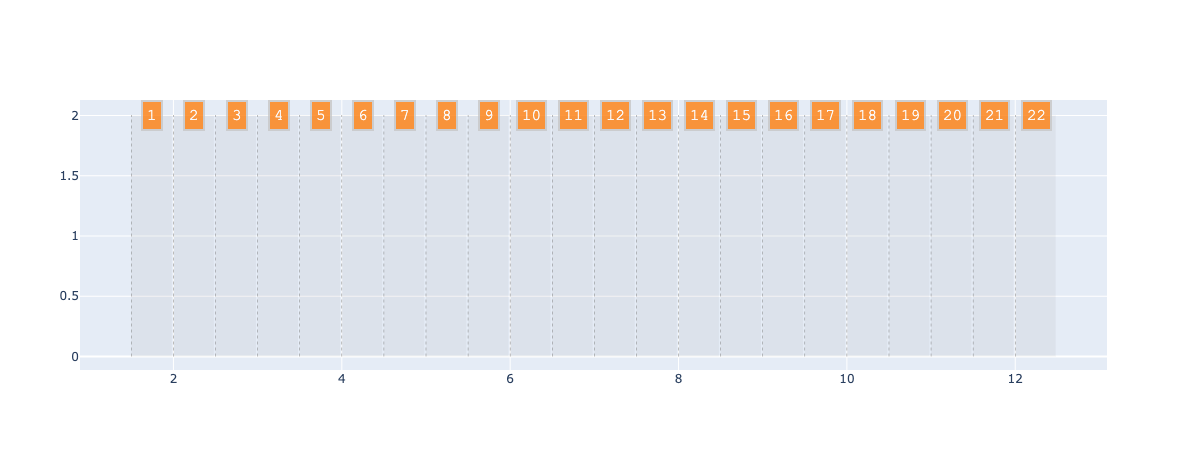

In [18]:
fig = go.Figure()

# plot the vertical lines for each fraction
for idx,i in enumerate(np.arange(1.5,12.5,0.5)):
    fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=i,
            y0=0,
            x1=i,
            y1=2,
            line=dict(
                color="grey",
                width=0.5,
                dash='dot'
            )
    ))

    fig.add_trace( # add invisible filled trace for hovering
        go.Scatter(
            x=[i,i,i+0.48,i+0.48,i], 
            y=[0,2,2,0,0], 
            fill="toself",
            fillcolor='grey',
            showlegend=False,
            hoverinfo='skip',
            mode='text',
            name='',
            opacity=0.1
        )
    )


    fig.add_annotation(
            x=i+0.25,
            y=2,
            xref="x",
            yref="y",
            text=f"{idx+1}",
            #textangle=-90,
            font=dict(
                family="Courier New, monospace",
                size=16,
                color="#ffffff"
                ),
            align="center",
            showarrow=False,
            bordercolor="#c7c7c7",
            borderwidth=2,
            borderpad=4,
            bgcolor="#ff7f0e",
            opacity=0.8
            )
fig.show()

In [37]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=np.linspace(0,15,plot_df.shape[0]),
    y=y,
    name="yaxis1 data"
))


fig.add_trace(go.Scatter(
    x=np.linspace(0,15,plot_df.shape[0]),
    y=y2,
    name="yaxis2 data",
    yaxis="y2"
))


# Create axis objects
fig.update_layout(
    xaxis=dict(
        domain=[0.24, 1]
    ),
    yaxis=dict(
        title="yaxis title",
        titlefont=dict(
            color="#1f77b4"
        ),
        tickfont=dict(
            color="#1f77b4"
        )
    ),
    yaxis2=dict(
        title="yaxis2 title",
        titlefont=dict(
            color="#ff7f0e"
        ),
        tickfont=dict(
            color="#ff7f0e"
        ),
        anchor= "free",
        overlaying="y",
        side="left",
        position=0.15
    ))


NameError: name 'plot_df' is not defined

In [7]:

tree = ET.parse('/Users/trinhsk/Documents/var_log_wdata.xml') 

# get root element 
root = tree.getroot() 

In [1]:

new_xml_row_data = [('7/30/2020 2:15:20 PM', '3', '4ML_10mm_2ND_STAGE', '3', 'None', '2', '2', 'P01S02'),
                    ('7/30/2020 3:45:50 PM', '4', '4ML_10mm_2ND_STAGE',
                     '4', 'None', '3', '3', 'P01S03'),
                    ('7/30/2020 4:52:50 PM', '5', '4ML_10mm_2ND_STAGE',
                     '5', 'None', '4', '4', 'P01S04'),
                    ('7/30/2020 5:33:50 PM', '6', '4ML_10mm_2ND_STAGE',
                     '6', 'None', '5', '5', 'P02S01'),
                    ('7/30/2020 6:41:50 PM', '7', '4ML_10mm_2ND_STAGE',
                     '7', 'None', '6', '6', 'P02S02'),
                    ('7/30/2020 7:12:50 PM', '8', '4ML_10mm_2ND_STAGE',
                     '8', 'None', '7', '7', 'P02S03'),
                    ('7/30/2020 8:09:50 PM', '9', '4ML_10mm_2ND_STAGE',
                     '9', 'None', '8', '8', 'P02S04'),
                    ('7/30/2020 8:16:40 PM', '10', '4ML_10mm_2ND_STAGE',
                     '10', 'None', '9', '9', 'P03S01'),
                    ('7/30/2020 9:09:18 PM', '11', '4ML_10mm_2ND_STAGE',
                     '11', 'None', '10', '10', 'P03S02'),
                    ('7/30/2020 9:38:18 PM', '12', '4ML_10mm_2ND_STAGE',
                     '12', 'None', '10', '10', 'P03S03'),
                    ('7/30/2020 10:09:18 PM', '13', '4ML_10mm_2ND_STAGE',
                     '13', 'None', '11', '11', 'P03S04'),
                    ]


In [5]:
new_xml_row_data[0:1]

[('7/30/2020 2:15:20 PM',
  '3',
  '4ML_10mm_2ND_STAGE',
  '3',
  'None',
  '2',
  '2',
  'P01S02')]

In [4]:
def add_new_xml_row(root, new_xml_row_data):
    table = root[1].find('{urn:schemas-microsoft-com:office:spreadsheet}Table')
    for i,tup in enumerate(new_xml_row_data):
        # add new row in table
        row = ET.SubElement(table, '{urn:schemas-microsoft-com:office:spreadsheet}Row')
        for el in tup:
            # add new cell
            cell = ET.SubElement(row, '{urn:schemas-microsoft-com:office:spreadsheet}Cell')
            # set the style of cell
            cell.set('{urn:schemas-microsoft-com:office:spreadsheet}StyleID', 'NormalStyle')
            # add a data subelement
            data = ET.SubElement(cell, '{urn:schemas-microsoft-com:office:spreadsheet}Data')
            # set the style
            data.set('{urn:schemas-microsoft-com:office:spreadsheet}Type', 'String')
            # set the text value
            data.text = el 

In [10]:
#xmlfile = '/Volumes/npsg/tecan/SourceData/SecondStage/Scripts/Variable Log_2020-07-24 14-29-27.xml'
#xmlfile = '/Users/trinhsk/Documents/var_log.xml'
xmlfile = '/Users/trinhsk/Documents/Variable Log_2020-07-24 15-17-25.xml'
tree = ET.parse(xmlfile) 

# get root element 
root = tree.getroot() 
new_xml_row_data = [('7/25/2020 2:45:50 PM', '3', '4ML_10mm_2ND_STAGE', '3', 'None', '2', '2', 'P01S02'), 
                    ('7/25/2020 3:45:50 PM', '4', '4ML_10mm_2ND_STAGE', '4', 'None', '3', '3', 'P01S03'), 
                    ('7/25/2020 4:45:50 PM', '5', '4ML_10mm_2ND_STAGE', '5', 'None', '4', '4', 'P01S04'), 
                    ('7/25/2020 5:45:50 PM', '6', '4ML_10mm_2ND_STAGE', '6', 'None', '5', '5', 'P02S01'), 
                    ('7/25/2020 6:45:50 PM', '7', '4ML_10mm_2ND_STAGE', '7', 'None', '6', '6', 'P02S02'), 
                    ('7/25/2020 7:45:50 PM', '8', '4ML_10mm_2ND_STAGE', '8', 'None', '7', '7', 'P02S03'), 
                    ('7/25/2020 8:45:50 PM', '9', '4ML_10mm_2ND_STAGE', '9', 'None', '8', '8', 'P02S04'),     
                   ]

# add new row
add_new_xml_row(root, new_xml_row_data) 
# re-write the xml file to reflect change in row data
with open('/Users/trinhsk/Documents/var_log_wdata.xml', 'wb') as f:
    tree.write(f)

In [11]:
# check the changes were made within the ipython instance
for t in root[1][0]:
    for cell in t:
        if cell.items()[0][1] == "NormalStyle":
            for data in cell:
                print(data.text)

7/24/2020 3:27:20 PM
2
4ML_10mm_2ND STAGE
2
None
1
1
P01S01
7/25/2020 2:45:50 PM
3
4ML_10mm_2ND_STAGE
3
None
2
2
P01S02
7/25/2020 3:45:50 PM
4
4ML_10mm_2ND_STAGE
4
None
3
3
P01S03
7/25/2020 4:45:50 PM
5
4ML_10mm_2ND_STAGE
5
None
4
4
P01S04
7/25/2020 5:45:50 PM
6
4ML_10mm_2ND_STAGE
6
None
5
5
P02S01
7/25/2020 6:45:50 PM
7
4ML_10mm_2ND_STAGE
7
None
6
6
P02S02
7/25/2020 7:45:50 PM
8
4ML_10mm_2ND_STAGE
8
None
7
7
P02S03
7/25/2020 8:45:50 PM
9
4ML_10mm_2ND_STAGE
9
None
8
8
P02S04


In [4]:
def get_rows_xml(root):
    # number of rows of data - 1 for the header
    return len([r for r in root[1][0]]) - 1

In [6]:
def get_xml_text(xmlfile, gilson_number=gethostname()):
    tree = ET.parse(xmlfile)
    root = tree.getroot()
    cnt_rows = get_rows_xml(root)
    data_row_dict = dict()
    row_line = 0
    for row in root[1][0]:
        data_cnt = 0
        for cell in row:
            if cell.items()[0][1] == "NormalStyle":
                for data in cell:
                    if data_cnt == 0:
                        # have to convert to string bc cannot json serialise
                        # datetime object
                        data_row_dict[f'{row_line}_time'] = datetime.strptime(
                            data.text, orig_date_fmt).strftime('%Y-%b-%d %H:%M:%S')
                    if data_cnt == 1:
                        data_row_dict[f'{row_line}_sample_line'] = int(
                            data.text)
                    if data_cnt == 2:
                        data_row_dict[f'{row_line}_method_name'] = data.text
                    if data_cnt == 3:
                        data_row_dict[f'{row_line}_method_iteration'] = int(
                            data.text)
                    if data_cnt == 4:
                        data_row_dict[f'{row_line}_notes'] = data.text
                    if data_cnt == 5:
                        data_row_dict[f'{row_line}_sample_well'] = int(
                            data.text)
                    if data_cnt == 6:
                        data_row_dict[f'{row_line}_fraction_well'] = int(
                            data.text)
                    if data_cnt == 7:
                        data_row_dict[f'{row_line}_plate_loc'] = data.text
                        data_row_dict[f'{row_line}_gilson_number'] = gilson_number
                data_cnt += 1
        row_line += 1

    return data_row_dict, cnt_rows

In [10]:
tree = ET.parse('/Users/trinhsk/Documents/ElasticSearch_python_Docker/Variable Log_2020-08-14 15-02-21_15_test_20201408.xml')
root = tree.getroot()
cnt_rows = get_rows_xml(root)
for row in root[1][0]:
    print(row)

<Element '{urn:schemas-microsoft-com:office:spreadsheet}Alignment' at 0x1177ad458>
<Element '{urn:schemas-microsoft-com:office:spreadsheet}Font' at 0x1177ade08>


In [33]:
orig_date_fmt = '%m/%d/%Y %I:%M:%S %p'

In [34]:
ws = root.find('{urn:schemas-microsoft-com:office:spreadsheet}Worksheet')
for i, rw in enumerate(ws[0]): #table
    if i == 0:
        pass
    else:
        for j, cell in enumerate(rw):
            for data in cell:
                if j == 0:
                    data_row_dict[f'{i}_time'] = datetime.datetime.strptime(
                        data.text, orig_date_fmt).strftime('%Y-%b-%d %H:%M:%S')
                if j == 1:
                    data_row_dict[f'{i}_sample_line'] = int(
                        data.text)
                if j == 2:
                    data_row_dict[f'{i}_method_name'] = data.text
                if j == 3:
                    data_row_dict[f'{i}_method_iteration'] = int(
                        data.text)
                if j == 4:
                    data_row_dict[f'{i}_notes'] = data.text
                if j == 5:
                    data_row_dict[f'{i}_sample_well'] = int(
                        data.text)
                if j == 6:
                    data_row_dict[f'{i}_fraction_well'] = int(
                        data.text)
                if j == 7:
                    data_row_dict[f'{i}_plate_loc'] = data.text
                    data_row_dict[f'{i}_gilson_number'] = 'test' 
                #print(data.text)

In [35]:
data_row_dict

{'1_time': '2020-Aug-14 15:12:19',
 '1_sample_line': 4,
 '1_method_name': '4ML_10mm_2ND STAGE',
 '1_method_iteration': 2,
 '1_notes': None,
 '1_sample_well': 1,
 '1_fraction_well': 0,
 '1_plate_loc': 'P01S01',
 '1_gilson_number': 'test',
 '2_time': '2020-Aug-14 15:28:11',
 '2_sample_line': 5,
 '2_method_name': '4ML_10mm_2ND STAGE',
 '2_method_iteration': 3,
 '2_notes': None,
 '2_sample_well': 2,
 '2_fraction_well': 0,
 '2_plate_loc': 'P01S02',
 '2_gilson_number': 'test'}

In [ ]:
root[1].find('{urn:schemas-microsoft-com:office:spreadsheet}Table')
for i,tup in enumerate(new_xml_row_data):

In [7]:
get_xml_text('/Users/trinhsk/Documents/ElasticSearch_python_Docker/Variable Log_2020-08-14 15-02-21_15_test_20201408.xml')

({}, 1)

In [348]:
result = get_xml_text(xmlfi)
result

({'1_time': '7/24/2020 2:39:25 PM',
  '1_notes': None,
  '1_sample_well': '1',
  '1_plate_loc': 'P01S01',
  '2_time': '7/24/2020 2:39:25 PM',
  '2_notes': None,
  '2_sample_well': '1',
  '2_plate_loc': 'P01S01',
  '3_time': '7/24/2020 2:39:25 PM',
  '3_notes': None,
  '3_sample_well': '1',
  '3_plate_loc': 'P01S01'},
 3)

In [7]:
def get_xml_value(data_row_dict, cnt_rows, attr):
    assert attr in ['time', 'notes', 'sample_well', 'plate_loc'], f"That attribute name, {attr} does not exist in the XML value dictionary"
    return data_row_dict[f'{cnt_rows}_{attr}']

In [ ]:
run_start_time = get_xml_value(result[0], result[1], 'time')

In [319]:
sw_loc = get_xml_value(result[0], result[1], 'sample_well')
sw_loc

'1'

In [305]:
shared_drive = '/Volumes/npsg/tecan/SourceData/SecondStage/Sample List_Combined_tmp/'

In [8]:
def read_tsl_file(file_path, sample_well_loc):
    count = 0
    with open(file_path, 'r') as f:
        while True: 
            count += 1
            line = f.readline() 
            current_row_data = get_current_run_row(line, sample_well_loc)
            if current_row_data:
                break

            if not line: 
                break
    if not current_row_data:
        raise AttributeError(f"Current sample well not found in TSL file: {sample_well_loc}")
    return current_row_data 

In [9]:
def get_current_run_row(tsl_row, sample_well_loc):
    try:
        if re.search(fr'\t(?![0]){sample_well_loc}\t', tsl_row):
            print(tsl_row)
            return tsl_row.split('\t')[1:]
    except AttributeError:
        print('None found')
        return None 

In [10]:
def convert_to_dict(current_row_list):
    current_row_dict = {}
    brooks_bc, id_suffix = current_row_list[current_row_list.index('...') + 1].split('/')
    current_row_dict['method_name'] = current_row_list[0].strip() 
    current_row_dict['sample_name'] = current_row_list[1].strip()
    current_row_dict['barcode'] = current_row_list[3].strip()
    current_row_dict['brooks_bc'] = brooks_bc.strip()
    current_row_dict['id_suffix'] = id_suffix.strip() 
    current_row_dict['plate_loc'] = current_row_list[-1].strip()
    current_row_dict['notes'] = current_row_list[4]
    current_row_dict['sample_well'] = current_row_list[-2]
    return current_row_dict

In [346]:
convert_to_dict(r)

{'method_name': '4ML_10mm_2ND STAGE',
 'sample_name': 'M21523_5',
 'barcode': 'FB02646185',
 'brooks_bc': '127',
 'id_suffix': '13',
 'plate_loc': 'P01S03',
 'notes': '',
 'sample_well': '3'}

In [11]:
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail or ntpath.basename(head)

In [18]:
current_platform = system()
current_platform

In [19]:
current_host = gethostname()
current_host

'FR-N-S081093'

In [12]:
def upload_row_data(tsl_file_path, xml_log_file, uvdata_file_dir, db):
    '''print out the current running row data from raw worklist file and then repare for sql entry'''
    # ntpath can handle both windows ntpath and unix posixpath 
    
    tsl_file_name = path_leaf(tsl_file_path) 
    projectid = tsl_file_name.split('_', 1)[0]
    
    # parse XML file
    if current_platform == "Windows":
        xml_parent_dir = ntpath.normpath(f'C:\\Users\\{gil_num}\\Documents\\Trilution 3.0\\Exports\\')
    else:
        xml_parent_dir = '/Users/trinhsk/Documents/'
    xml_data_row_dict, row_count = get_xml_text(ntpath.join(xml_parent_dir, xml_log_file))
    
    # get sample well location
    sw_loc = get_sample_well_loc(xml_data_row_dict, row_count)
    
    # get current row data 
    current_row_list = read_tsl_file(tsl_file_path, sw_loc)
    current_row_dict = convert_to_dict(current_row_list)
    
    # convert AM/PM time to 24-hr format and with month name
    current_time = datetime.datetime.strptime(xml_data_row_dict[f'{row_count}_time'], '%m/%d/%Y %I:%M:%S %p').strftime('%Y-%b-%d %H:%M:%S')
    
    # get current uvdata csv file
    uvdata_file = get_current_uvdata_file(uvdata_file_dir, current_row_dict['sample_name'])
    
    assert current_row_dict['sample_well'] == xml_data_row_dict[f'{row_count}_sample_well'], \
        'sample well mis-match "{0}" does not equal "{1}"'.format(current_row_dict['sample_well'], xml_data_row_dict[f'{row_count}_sample_well'])
    
    #assert current_row_dict['notes'] == xml_data_row_dict[f'{row_count}_notes'], \
    #    'notes mis-match "{0}" does not equal "{1}"'.format(current_row_dict['notes'], xml_data_row_dict[f'{row_count}_notes'])
    
    assert current_row_dict['plate_loc'] == xml_data_row_dict[f'{row_count}_plate_loc'], \
        'plate location mis-match "{0}" does not equal "{1}"'.format(current_row_dict['plate_loc'], xml_data_row_dict[f'{row_count}_plate_loc'])
    
    df = pd.read_csv(uvdata_file)
    field_names = get_field_names(df)
    channel_names = get_chnl_names(df)
    data_dict = gen_data_dict(channel_names, sep_data_into_lists(df, channel_names))
    
    row_data = [current_time,
                projectid,
                current_host,
                current_row_dict['method_name'],
                current_row_dict['sample_name'],
                current_row_dict['barcode'],
                current_row_dict['brooks_bc'],
                current_row_dict['id_suffix'],
                sw_loc,
                current_row_dict['plate_loc'],
                tsl_file_name,
                path_leaf(xml_log_file),
                path_leaf(uvdata_file),
                data_dict
    ]
    
    upload_mongo(db, row_data)
    return row_data
    #print(row_data)

In [285]:
d =  upload_row_data('/Users/trinhsk/Documents/GitRepos/gilson_comb_wrklst/test_files/15_test.tsl',\
                     'var_log_wdata.xml',\
                     '/Users/trinhsk/Documents/GitRepos/gilson_comb_wrklst/test_files/',\
                     db)

RUN	4ML_10mm_2ND STAGE	L7547_3	0	FB02928213		YES	UNKNOWN	...	127/12	7	P02S03



In [30]:
df = pd.DataFrame(data=d[-1])
df = change_dtype(df)
df = shift_baseline(df)

In [13]:
def get_mongo_data(db, project_id, sample_well):
    return db.worklist_collection[project_id].find({'sample_well':sample_well}, {"_id": 0})[0]

In [14]:
def create_plot(dict_data):
    fig = go.Figure()
    # Create figure with secondary y-axis
    df = pd.DataFrame(dict_data['uvdata'])
    df = change_dtype(df)
    df = shift_baseline(df)
    xs = np.linspace(0,12.62,df.shape[0])

    for cn in df.columns:
        if re.search(r'\d', cn):
            name = f'{cn} nm'
        else:
            name = cn 

        fig.add_trace(go.Scatter(x=xs, y=df[cn],
                            mode='lines',
                            name=name,
                            hoverinfo='skip')
                            )
        
    xs, ys = gen_solv_data(df, xs)
    fig.add_trace(go.Scatter(x=xs, y=ys,
                        opacity=0.7,
                        line=dict(color='grey', width=2),
                        name='solv grad', yaxis="y2",
                        hoverinfo='skip')
                        )
    # plot the vertical lines for each fraction
    for idx,i in enumerate(np.arange(1.5,12.5,0.5)):
        fig.add_shape(
            # Line Vertical
            dict(
                type="line",
                x0=i,
                y0=0,
                x1=i,
                y1=2,
                line=dict(
                    color="grey",
                    width=0.5,
                    dash='dot'
                )
        ))
        
        fig.add_trace( # add invisible filled trace for hovering
            go.Scatter(
                x=[i,i,i+0.48,i+0.48,i], 
                y=[0,2,2,0,0], 
                fill="toself",
                fillcolor='grey',
                showlegend=False,
                hovertemplate=
                f"{dict_data['plate_loc']}:FX_{idx+1}",
                mode='text',
                name=f"{dict_data['plate_loc']}:FX_{idx+1}",
                opacity=0.1
            )
        )

    fig.update_layout( # update only the hover layout
        hoverlabel=dict(
            bgcolor="#2b3f75", 
            font_size=16, 
            font_family="Rockwell"
        )
    )
    fig.update_xaxes(showspikes=True) # show the spikelines upon hover (only works at the top)

    fig.update_layout(
            title = f"""{dict_data['project_id']}/{dict_data['id_suffix']}, 
                        {dict_data['barcode']}, {dict_data['plate_loc']},
                        {dict_data['method_name']}, {dict_data['gilson_number']}""",
            xaxis = dict(
                title = "Minutes",
                domain=[0.12, 1]
            ),
            yaxis = dict(
            title = "UV Abs",
            range = [df.min().min()-0.1, 2.07],
            position = 0.1,
            showgrid = False
            ),
            yaxis2 = dict(
            title = "Solvent Gradient  (%)",
            anchor="free",
            domain=[0.1,1],
            overlaying="y",
            side="left",
            position=0,
            range=[0,102])

        )

    config = {
        'displayModeBar': True,
        'editable': True,
        'showLink':False,
        'displaylogo': False
    }

    fig.show(config=config)


In [325]:
dict_data = get_mongo_data(db, '15', '4')

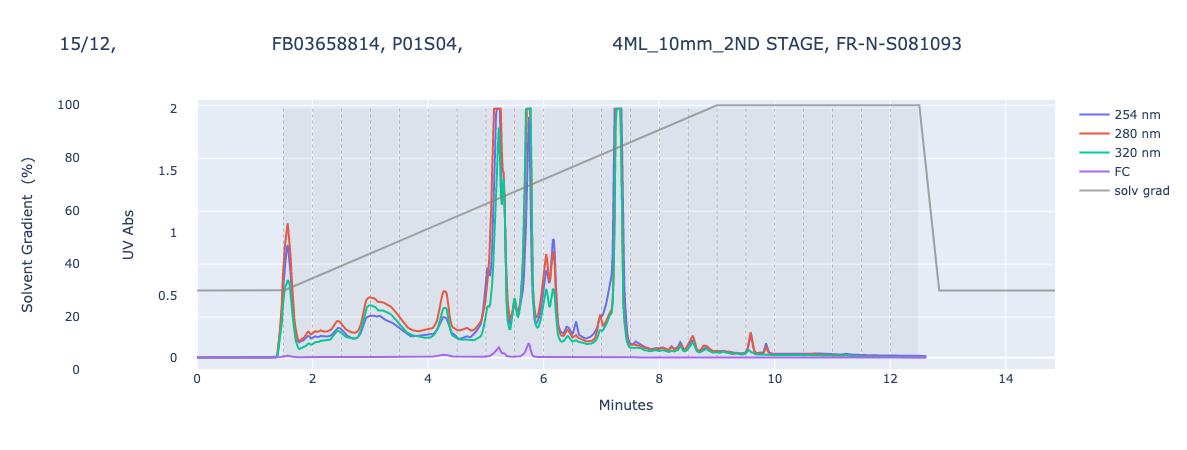

In [329]:
create_plot(dict_data)

In [407]:
for xmlfile in os.listdir(ntpath.dirname(shared_drive)):
    xml_datetime = datetime.datetime.strptime(path_leaf(xmlfile).split('_')[1][:-4], '%Y-%m-%d %H-%M-%S')
    time_deltas = [datetime.datetime.now() - xml_datetime,  datetime.timedelta(hours=1)]
    newest_file_index = [i for i, td in enumerate(time_deltas) if td == min(time_deltas)][0]
    

15200300_01_02_127_134.tsl
15200300_02_03_134_138.tsl
15200300_02_04_134_143.tsl
15200300_02_05_134_192.tsl
15200300_04_07_143_235.tsl
15200300_05_07_192_235.tsl
15200600_01_02_15200600010_15200600020.tsl


In [332]:
get_newest_xmlfile('/Users/trinhsk/Documents/')

'/Users/trinhsk/Documents/var_log_wdata.xml'

In [331]:
def get_newest_xmlfile(xml_file_directory):
    '''
        return newest file for reading/parsing
    '''
    #os.chdir(xml_file_directory)
    xml_filters=[lambda x: os.path.isfile(x),  lambda x: x.endswith('.xml')]
    files = list(filter(lambda x: all([f(x) for f in xml_filters]), os.listdir(xml_file_directory)))
    files = [os.path.join(xml_file_directory, f) for f in files] # add path to each file
    files.sort(key=lambda x: os.path.getmtime(x), reverse=True)
    return files[0]

In [26]:
# get any date in 20XX with timestampe at end
REGEX_TIMESTAMP = r'(20)\d\d[- /.](0[1-9]|1[012])[- /.](0[1-9]|[12][0-9]|3[01])_\d{2}-\d{2}-\d{2}-[PA]M'

def extract_datetime(datetime_string):
    return datetime.datetime.strptime(re.search(REGEX_TIMESTAMP, datetime_string).group(0), '%Y-%m-%d_%I-%M-%S-%p')

# compare the timestampe of the file name with current time (within 4 hours)
def compare_timestamp(file_name_path, within_time = datetime.timedelta(hours=24)):
    start_time = extract_datetime(file_name_path) 
    now = datetime.datetime.now()
    if now - start_time > within_time:
        return False, now-start_time 
    else:
        return True , now-start_time
    
# get the file path of the current row (according to sample name)
def get_current_uvdata_file(uvdata_file_directory, sample_name):
    '''
         find csv file that is within the current timestampe (today) and matches the sample name
    '''
    os.chdir(uvdata_file_directory)
    uvdata_file_filters=[lambda x: os.path.isfile(x),  lambda x: x.endswith('.csv'), lambda x: re.search(f'{sample_name}', x)]
    files = list(filter(lambda x: all([f(x) for f in uvdata_file_filters]), os.listdir(uvdata_file_directory)))
    
    check_file_ts = compare_timestamp(ntpath.join(uvdata_file_directory,files[0]))
    assert check_file_ts[0] == True, \
        'raw uv-data file is older by {0} than the allowed timeframe; is it the correct file? - sample name:"{1}" questionable file: "{2}"'.format(str(check_file_ts[1]),sample_name, files[0])
    return files[0]

In [224]:
get_current_uvdata_file('/Users/trinhsk/Documents/GitRepos/gilson_comb_wrklst/test_files', 'L88759_2')

'20200726_6_L88759_2_(3)_2020-07-26_09-30-20-PM_at_10-46-24-PM_(2).csv'

In [34]:
get_newest_xmlfile('/Users/trinhsk/Documents/')

'/Users/trinhsk/Documents/var_log.xml'

In [35]:
raw_results_dir = '/Volumes/npsg/tecan/SourceData/SecondStage/Scripts/RESULTS_Raw Data/'

In [47]:
data_dict = {}
for fi in os.listdir(raw_results_dir):
    if fi.endswith('M.csv') and re.search(r'[CNLM]\d+_\d{1}',fi):
        #cnt = 1
        if os.path.getsize(os.path.join(export_dir, fi)) > 10000:
            file_name = re.search(r'[CNLM]\d+_\d{1}',fi).group(0)
            if file_name in data_dict:
                pass
                #cnt += 1
                #file_name += f"__{cnt}"
            data_dict[file_name] = pd.read_csv(os.path.join(export_dir, fi))
            with open(os.path.join('test_files', fi), encoding='utf-8') as fwr:
                fwr.write()

In [48]:
data_dict.keys()

dict_keys(['M1065_5', 'M1065_6', 'M21125_5', 'M8787_6', 'M17891_4'])

In [49]:
for d in data_dict.values():
    print(d.shape)

(7604, 1)
(7601, 1)
(7570, 1)
(7594, 1)
(7588, 1)


In [23]:
def get_field_names(df):
    field_names = ['iteration', 'sample_well', 'sample_name',
                   'barcode', 'run_name', 'run_date', 'method_start_time']
    field_idices = [1, 2, 3, 4, 10, 11, 12]
    field_dict = {}
    for i, fn in zip(field_idices, field_names):
        field_dict[fn] = df.iloc[i].values[0].split(':', 1)[1]
    return field_dict


def get_chnl_names(df):
    return [ch.split(':')[1] for ch in df.iloc[19].values[0].split('\t')]


def sep_data_into_lists(df, channel_names):
    data_dict = {ch_name : [] for ch_name in channel_names}
    
    for i, r in df.iloc[26:].iterrows():
        tmp_ = r[' Step Info'].split('\t')
        if i % 10 == 0:  # reduce sample rate
            data_dict[channel_names[0]].append(tmp_[0])
            data_dict[channel_names[1]].append(tmp_[1])
            data_dict[channel_names[2]].append(tmp_[2])
            data_dict[channel_names[3]].append(tmp_[3])
            
    return [val for val in data_dict.values()]


def gen_data_dict(channel_names, channel_vals):
    return {ch_nm: ch_vals for ch_nm, ch_vals in zip(channel_names, channel_vals)}


def gen_solv_data(df, xs):
    idx_15, idx_9, idx_125 = (
        np.where((xs < j+0.01) & (xs > j-0.01))[0][0] for j in [1.5, 9, 12.5])
    steps = np.mean(np.diff(xs))
    last_phase = np.arange(12.63, 15, steps) # +0.01 so that the downward slope doesnt have a kink on it
    idx_13 = np.where((last_phase > 12.99) & (last_phase < 13.02))[0][0]
    xs_ext = np.concatenate((xs, last_phase))
    solv_grad_data = np.concatenate((np.repeat(30, idx_15),
                                     np.linspace(30, 100, idx_9-idx_15),
                                     np.repeat(100, idx_125-idx_9),
                                     np.linspace(100, 30, idx_13),
                                     np.repeat(30, len(last_phase) - idx_13)
                                     ))
    return xs_ext, solv_grad_data


def shift_baseline(df):
    d_min = df.min().min()
    # correct baseline to be at zero by add to all values the min value
    for cn in df.columns:
        df[cn] = df[cn].apply(lambda x: x + abs(d_min))
    return df


def change_dtype(df):
    for ch in df.columns:
        df[ch] = df[ch].astype('float')
    return df

In [2]:
from pymongo import MongoClient

In [3]:
client = MongoClient('mongodb://localhost:27017/')

In [4]:
db = client.gilson_logs

In [28]:
db.worklist_collection['15'].find({}).sort([("_id", 1)])

In [11]:
collect_list

['worklist_collection.15_3',
 'worklist_collection.15_4',
 'worklist_collection.15',
 'worklist_collection.15_2']

In [9]:
collect_list = db.list_collection_names()

In [252]:
def upload_mongo(db, row_data):
    mgdb_keys = [ 
            'time_stamp',
            'project_id',
            'gilson_number',
            'method_name',
            'sample_name',
            'barcode',
            'brooks_barcode',
            'id_suffix',
            'sample_well',
            'plate_loc',
            'tsl_file_name',
            'xml_file_name',
            'uvdata_file_name',
            'uvdata'
        ] 
    data_dict = {k:v for k,v in zip(mgdb_keys, row_data)}
        
    collection = db.worklist_collection[row_data[1]]
    
    return collection.insert_one(data_dict).inserted_id

In [253]:
upload_mongo(db, d)

ObjectId('5f1f3de7a555dc07904f5780')

In [269]:
len([e for e in db.worklist_collection['15'].find({})])

2

In [293]:
db.worklist_collection['15'].find({'sample_well':'1'}, {"uvdata": 1, "_id": 0})[0]['uvdata']

{'254': ['3.276E-05',
  '6.414E-05',
  '0.00011335',
  '8.378E-05',
  '-7.39E-06',
  '6.104E-05',
  '-1.109E-05',
  '7.31E-05',
  '-4.514E-05',
  '3.117E-05',
  '5.244E-05',
  '7.09E-06',
  '9.96E-06',
  '2.285E-05',
  '-4.098E-05',
  '-0.00015579',
  '-7.431E-05',
  '-9.311E-05',
  '-0.00010381',
  '-0.0001495',
  '-0.00019683',
  '-8.088E-05',
  '-0.00011484',
  '-9.479E-05',
  '-9.061E-05',
  '-0.00012697',
  '-7.284E-05',
  '-0.00016269',
  '-0.00011492',
  '-9.602E-05',
  '-0.00017173',
  '-0.00017348',
  '-0.00014728',
  '-0.00018683',
  '-0.00019901',
  '-0.00017247',
  '-0.00023113',
  '-0.00018577',
  '-0.00020106',
  '-0.00023774',
  '-0.00031154',
  '-0.00024707',
  '-0.00020656',
  '-0.00019336',
  '-0.00029007',
  '-0.00023037',
  '-0.0001957',
  '-0.00021165',
  '-0.00019403',
  '-0.00022449',
  '-0.00026739',
  '-0.00023073',
  '-0.00031842',
  '-0.00028873',
  '-0.00025415',
  '-0.00030978',
  '-0.00032271',
  '-0.0004211',
  '-0.00041908',
  '-0.0003273',
  '-0.000348'

In [267]:
for e in db.worklist_collection['15'].find({'sample_well':'1'}):
    pprint(e)

{'_id': ObjectId('5f1f3de7a555dc07904f5780'),
 'barcode': 'FB02646205',
 'brooks_barcode': '127',
 'gilson_number': 'FR-N-S081093',
 'id_suffix': '12',
 'method_name': '4ML_10mm_2ND STAGE',
 'plate_loc': 'P01S01',
 'project_id': '15',
 'sample_name': 'M21535_5',
 'sample_well': '1',
 'time_stamp': '2020-Jul-24 15:27:20',
 'tsl_file_name': '15_test.tsl',
 'uvdata': {'254': ['3.276E-05',
                    '6.414E-05',
                    '0.00011335',
                    '8.378E-05',
                    '-7.39E-06',
                    '6.104E-05',
                    '-1.109E-05',
                    '7.31E-05',
                    '-4.514E-05',
                    '3.117E-05',
                    '5.244E-05',
                    '7.09E-06',
                    '9.96E-06',
                    '2.285E-05',
                    '-4.098E-05',
                    '-0.00015579',
                    '-7.431E-05',
                    '-9.311E-05',
                    '-0.00010381',
          

In [12]:
pokemon_df = pd.read_csv('/Users/trinhsk/Downloads/pokemon.csv')

In [13]:
pokemon_df.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [14]:
df = pokemon_df.copy()

In [15]:
import seaborn as sb

In [28]:
pokemon_types = df.melt(['id', 'species'],value_vars=['type_1', 'type_2'], var_name = 'type_level', value_name = 'type').dropna()
pokemon_types[802:812]

,id,species,type_level,type
802,803,poipole,type_1,poison
803,804,naganadel,type_1,poison
804,805,stakataka,type_1,rock
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric
807,1,bulbasaur,type_2,poison
808,2,ivysaur,type_2,poison
809,3,venusaur,type_2,poison
812,6,charizard,type_2,flying
818,12,butterfree,type_2,flying


In [31]:
type_counts = pokemon_types['type'].value_counts()
type_order = type_counts.index

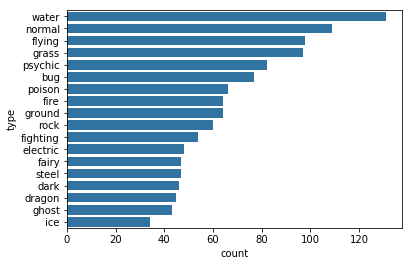

In [32]:
base_colour = sb.color_palette()[0]
sb.countplot(data = pokemon_types, y= 'type', color = base_colour, order = type_order)

In [33]:
n_pokemon = df.shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count/ n_pokemon
print(max_prop)

0.1623296158612144


In [35]:

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

In [36]:
tick_props

array([0.  , 0.05, 0.1 , 0.15])

In [37]:
tick_names

['0.00', '0.05', '0.10', '0.15']

In [41]:
import matplotlib.pyplot as plt

In [49]:
type_order

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'fire', 'ground', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')

In [56]:
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
fire         64
ground       64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

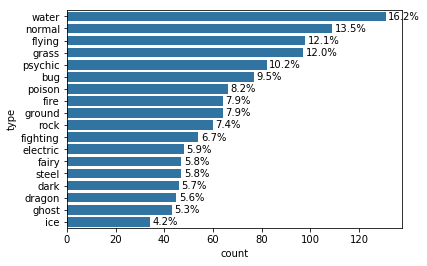

In [59]:
sb.countplot(data = pokemon_types, y = 'type', color = base_colour, order = type_order)

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(count+1, i, pct_string, va= 'center')


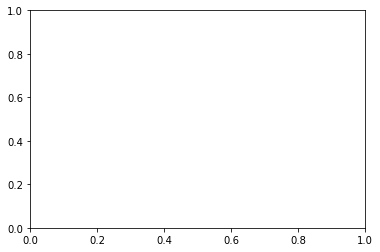

In [60]:
locs, labels = plt.xticks()

In [65]:
labels[0]

Text(0.0, 0, '0.0')